# 1. Import Library dan Datset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline
from matplotlib import cm
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from random import sample
from numpy.random import uniform
from math import isnan
 

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score


In [2]:
#Impor Data Ritel Online yang berisi transaksi dari 12/01/2010 dan 12/09/2011
df = pd.read_excel('rfm_dataset.xlsx')
df.head()

,DATE,CUSTOMER,BR/BKJ,RASPBERRY,BLUEBERRY,FROZEN RASPBERRY,CAPE GOOSEBERRY,TEA,JAM,NO NOTA,PRICE '/GRS,TOTAL HARGA
0,2023-11-01,PT. Graha Alam Lestari Pastry po 132401,BR,2000.0,NaN,NaN,NaN,NaN,NaN,16914.0,440,880000
1,2023-11-01,PT. Graha Alam Lestari Pastry po 132401,BR,NaN,750.0,NaN,NaN,NaN,NaN,16914.0,550,412500
2,2023-11-01,PT. Graha Alam Lestari Koral po 132401,BR,500.0,NaN,NaN,NaN,NaN,NaN,16915.0,440,220000
3,2023-11-01,Melia Bali,BR,2000.0,NaN,NaN,NaN,NaN,NaN,16916.0,440,880000
4,2023-11-01,Folie,BR,500.0,NaN,NaN,NaN,NaN,NaN,16917.0,440,220000


# 2. Cleaning Dataset

In [3]:
#Melakukan pengecekan shape (columns and rows) dari dataset
df.shape

(346, 12)

In [4]:
#Check missing value pada dataset
df.isnull().sum(axis=0)

DATE                  0
CUSTOMER              0
BR/BKJ                0
RASPBERRY            31
BLUEBERRY           344
FROZEN RASPBERRY    339
CAPE GOOSEBERRY     325
TEA                 345
JAM                 346
NO NOTA               9
PRICE '/GRS           0
TOTAL HARGA           0
dtype: int64

In [5]:
df['RASPBERRY'].fillna(0, inplace=True)
df['BLUEBERRY'].fillna(0, inplace=True)
df['FROZEN RASPBERRY'].fillna(0, inplace=True)
df['CAPE GOOSEBERRY'].fillna(0, inplace=True)
df['TEA'].fillna(0, inplace=True)
df['JAM'].fillna(0, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_28284\175551796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RASPBERRY'].fillna(0, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_28284\175551796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [6]:
df.isnull().sum(axis=0)

DATE                0
CUSTOMER            0
BR/BKJ              0
RASPBERRY           0
BLUEBERRY           0
FROZEN RASPBERRY    0
CAPE GOOSEBERRY     0
TEA                 0
JAM                 0
NO NOTA             9
PRICE '/GRS         0
TOTAL HARGA         0
dtype: int64

In [7]:
df = df.dropna(subset=['NO NOTA'])

In [8]:
df.shape

(337, 12)

In [9]:
df.isnull().sum(axis=0)

DATE                0
CUSTOMER            0
BR/BKJ              0
RASPBERRY           0
BLUEBERRY           0
FROZEN RASPBERRY    0
CAPE GOOSEBERRY     0
TEA                 0
JAM                 0
NO NOTA             0
PRICE '/GRS         0
TOTAL HARGA         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 345
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              337 non-null    datetime64[ns]
 1   CUSTOMER          337 non-null    object        
 2   BR/BKJ            337 non-null    object        
 3   RASPBERRY         337 non-null    float64       
 4   BLUEBERRY         337 non-null    float64       
 5   FROZEN RASPBERRY  337 non-null    float64       
 6   CAPE GOOSEBERRY   337 non-null    float64       
 7   TEA               337 non-null    float64       
 8   JAM               337 non-null    float64       
 9   NO NOTA           337 non-null    float64       
 10  PRICE '/GRS       337 non-null    int64         
 11  TOTAL HARGA       337 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 34.2+ KB


# 3. RFM Modelling

- Recency = Latest Date - Last Inovice Data
- Frequency = count of invoice no. of transaction(s)
- Monetary = Sum of Total 

In [11]:
import datetime as dt

In [12]:
df['DATE'].max()

Timestamp('2023-11-29 00:00:00')

In [13]:
#Menetapkan tgl terbaru 2023-11-30, hal ini untuk menghitung jumlah hari sejak tanggal invoice terakhir
Latest_Date = dt.datetime(2023,11,30)

In [14]:
#Membuat RFM Modelling scores untuk setiap customet
rfm_scores = df.groupby('CUSTOMER').agg({
    #Recency
    'DATE': lambda x: (Latest_Date - x.max()).days,

    #Frequency
    'NO NOTA': lambda x: len(x),

    #Monetary
    'TOTAL HARGA': lambda x: x.sum()
})

In [15]:
rfm_scores.head()

,DATE,NO NOTA,TOTAL HARGA
CUSTOMER,,,
Bintang Hayam Wuruk po 00233,24,2,509000
Bintang Hayam Wuruk po 01602,17,2,509000
Bintang Hayam Wuruk po 03293,10,1,425000
Bintang Hayam Wuruk po 05659,3,1,637500
Bintang Seminyak,3,3,1487500


In [16]:
#Convert data type dari InvoiceDate menjadi int
rfm_scores['DATE'] = rfm_scores['DATE'].astype(int)

In [17]:
#Rename column pada rfm_scores
rfm_scores.rename(columns={
    'DATE': 'Recency',
    'NO NOTA': 'Frequency',
    'TOTAL HARGA': 'Monetary'
}, inplace=True)

In [18]:
#Tampilkan dan reset index
rfm_scores.reset_index().head()

,CUSTOMER,Recency,Frequency,Monetary
0,Bintang Hayam Wuruk po 00233,24,2,509000
1,Bintang Hayam Wuruk po 01602,17,2,509000
2,Bintang Hayam Wuruk po 03293,10,1,425000
3,Bintang Hayam Wuruk po 05659,3,1,637500
4,Bintang Seminyak,3,3,1487500


cek outliers dengan boxplot

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\sit

<Axes: >

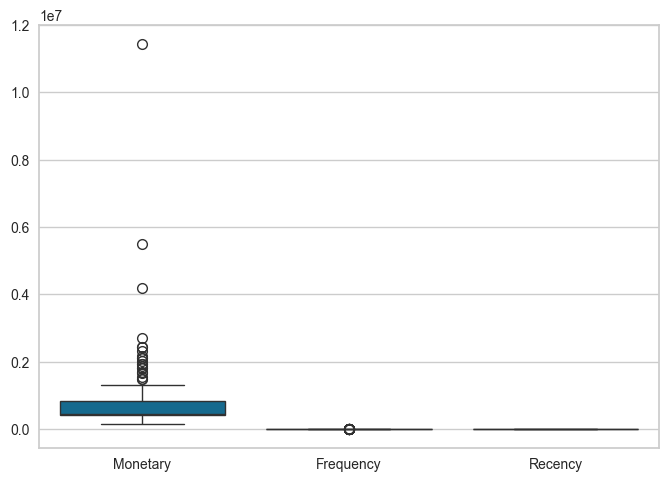

In [19]:
variables = ['Monetary','Frequency','Recency']
sns.boxplot(data= rfm_scores[variables])

In [20]:
rfm_scores.shape

(202, 3)

In [21]:
rfm_scores.describe()

,Recency,Frequency,Monetary
count,202.000000,202.000000,2.020000e+02
mean,13.366337,1.668317,7.545792e+05
std,9.005496,1.500874,9.981844e+05
min,1.000000,1.000000,1.400000e+05
25%,5.000000,1.000000,4.250000e+05
50%,13.000000,1.000000,4.400000e+05
75%,22.000000,2.000000,8.318750e+05
max,29.000000,13.000000,1.144000e+07


In [22]:
#Split menjadi empat segmen menggunakan kuartil
split = rfm_scores.quantile(q=[0.25,0.5,0.75])
split = split.to_dict()

In [23]:
split

{'Recency': {0.25: 5.0, 0.5: 13.0, 0.75: 22.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 425000.0, 0.5: 440000.0, 0.75: 831875.0}}

In [24]:
#Fungsi untuk membuat R, F and M segments

#Recency
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

#Frequency  
def FScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Monetary 
def MScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [25]:
#Hitung & Tambahkan kolom nilai segmen R, F dan M di kumpulan data yang ada untuk menampilkan nilai segmen R, F dan M
rfm_scores['R'] = rfm_scores['Recency'].apply(RScoring, args=('Recency',split,))
rfm_scores['F'] = rfm_scores['Frequency'].apply(FScoring, args=('Frequency',split,))
rfm_scores['M'] = rfm_scores['Monetary'].apply(MScoring, args=('Monetary',split,))
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M
CUSTOMER,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2
Bintang Seminyak,3,3,1487500,1,1,1


In [26]:
#Hitung dan tambahkan pada column baru RFMGroup untuk melihat kombinasi dari rfm score
rfm_scores['RFMGroup'] = rfm_scores.R.map(str) + rfm_scores.F.map(str) + rfm_scores.M.map(str)

In [27]:
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CUSTOMER,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142
Bintang Seminyak,3,3,1487500,1,1,1,111


In [28]:
#Hitung dan tambahkan pada column baru RFMScore untuk menampilkan total sum dari RFMGroup values
rfm_scores['RFMScore'] = rfm_scores[['R', 'F', 'M']].sum(axis=1)
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CUSTOMER,,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7
Bintang Seminyak,3,3,1487500,1,1,1,111,3


In [30]:
# RFMScore 1 diberikan Single-time
# RFMScore 2-4 diberikan Occasional
# RFMScore 5-9 diberikan Potential
# RFMScore 10-12 diberikan Loyal

# Menetapkan batas untuk kategori RFMScore
bins = [0, 1, 5, 10, 12]
# Menetapkan label untuk masing-masing kategori
labels = ['Single-time', 'Occasional', 'Potential', 'Loyal']

# Menetapkan Loyalty Level untuk setiap customer berdasarkan RFMScore
rfm_scores['RFM_Loyalty_Level'] = pd.cut(rfm_scores['RFMScore'], bins=bins, labels=labels, right=False)

# Menampilkan hasil
rfm_scores.reset_index().head()


# #Menetapkan Loyalty Level untuk masing-masing customer
# Loyalty_Level = ['Single-time', 'Occasional', 'Potential', 'Loyal']
# Score_cuts = pd.qcut(rfm_scores.RFMScore, q = 4, labels = Loyalty_Level)
# rfm_scores['RFM_Loyalty_Level'] = Score_cuts.values
# rfm_scores.reset_index().head()

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8,Potential
1,Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7,Potential
2,Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10,Loyal
3,Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7,Potential
4,Bintang Seminyak,3,3,1487500,1,1,1,111,3,Occasional


In [31]:
#Validate the data for RFMGroup = 444 adalah loyal
loyal=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Loyal'].sort_values('Monetary', ascending=False).reset_index().head(30)
loyal

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,COD - Ruster (grade B),29,1,600000,4,4,2,442,10,Loyal
1,COD - Frencha - uluwatu,27,1,600000,4,4,2,442,10,Loyal
2,The Mulia Pastry po31542,17,1,440000,3,4,3,343,10,Loyal
3,Bulgary po 178882,29,1,440000,4,4,3,443,11,Loyal
4,The Mulia Commisary po 30226,29,1,440000,4,4,3,443,11,Loyal
5,The Mulia Commisary po 30496,27,1,440000,4,4,3,443,11,Loyal
6,The Mulia Commisary po 30756,24,1,440000,4,4,3,443,11,Loyal
7,Hyatt Andaz po 31937,17,1,440000,3,4,3,343,10,Loyal
8,Hyatt Andaz po 31668,24,1,440000,4,4,3,443,11,Loyal
9,The Mulia Commisary po 31441,20,1,440000,3,4,3,343,10,Loyal


In [32]:
#Validate the data for RFMGroup = 444 adalah loyal
potential=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Potential'].sort_values('Monetary', ascending=False).reset_index().head(30)
potential

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,The Mulia Commisary po 32947,6,1,1320000,2,4,1,241,7,Potential
1,COD - Cocoku,19,2,1320000,3,2,1,321,6,Potential
2,PT. Graha Alam Lestari Pastry po 132401,29,2,1292500,4,2,1,421,7,Potential
3,COD - Indigo,10,2,1160000,2,2,1,221,5,Potential
4,The Mulia Commisary po33105,3,1,1100000,1,4,1,141,6,Potential
5,PT. Graha Alam Lestari Pastry po 134890,6,1,1100000,2,4,1,241,7,Potential
6,Pepito Echo Beach,6,2,1062500,2,2,1,221,5,Potential
7,COD - Wood/ pick up,29,2,990000,4,2,1,421,7,Potential
8,Papaya po 0183,22,2,985000,3,2,1,321,6,Potential
9,Bintang Ubud po 01071,19,2,917500,3,2,1,321,6,Potential


In [33]:
#Validate the data for RFMGroup = 444 adalah loyal
occasional=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Occasional'].sort_values('Monetary', ascending=False).reset_index().head(30)
occasional

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,Melia Bali,1,13,11440000,1,1,1,111,3,Occasional
1,COD - Alive,1,6,5510000,1,1,1,111,3,Occasional
2,COD - Butterman,1,10,4180000,1,1,1,111,3,Occasional
3,Canggu Station,1,5,2709375,1,1,1,111,3,Occasional
4,Pepito SWJ,1,5,2443750,1,1,1,111,3,Occasional
5,Pepito Peliatan,5,4,2443750,1,1,1,111,3,Occasional
6,COD - Usha,3,6,2310000,1,1,1,111,3,Occasional
7,Delta,5,4,2178125,1,1,1,111,3,Occasional
8,Popular Deli,1,5,2125000,1,1,1,111,3,Occasional
9,Pepito Andong,5,4,2125000,1,1,1,111,3,Occasional


In [34]:
#Validate the data for RFMGroup = 444 adalah loyal
single_time=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Single-time'].sort_values('Monetary', ascending=False).reset_index().head(30)
single_time

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level


In [35]:
rfm_scores['RFM_Loyalty_Level'].value_counts()

RFM_Loyalty_Level
Potential      84
Loyal          70
Occasional     30
Single-time     0
Name: count, dtype: int64

In [36]:
# Aggregation on RFM Score on the dataset
rfm_scores[["RFMScore", "Recency", "Frequency", "Monetary"]].groupby("RFMScore").agg(["mean", "max", "min"])

Recency         Frequency              Monetary                  
               mean max min      mean max min          mean       max     min
RFMScore                                                                     
3          2.700000   5   1  5.050000  13   3  2.653194e+06  11440000  990000
4          7.400000  13   5  3.500000   4   3  1.383250e+06   1945000  660000
5          7.166667  10   5  2.500000   3   2  8.287500e+05   1160000  660000
6          8.666667  22   1  1.666667   2   1  7.977083e+05   1320000  440000
7         11.090909  29   1  1.409091   2   1  7.439602e+05   1320000  440000
8         11.250000  29   1  1.187500   2   1  6.182188e+05    880000  440000
9          9.785714  27   1  1.000000   1   1  4.596429e+05    880000  220000
10        14.029412  29   6  1.000000   1   1  3.866176e+05    600000  220000
11        21.416667  29  15  1.000000   1   1  3.536111e+05    440000  140000
12        26.611111  29  24  1.000000   1   1  3.322222e+05    425000  140000

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

<Axes: xlabel='RFM_Loyalty_Level', ylabel='Count'>

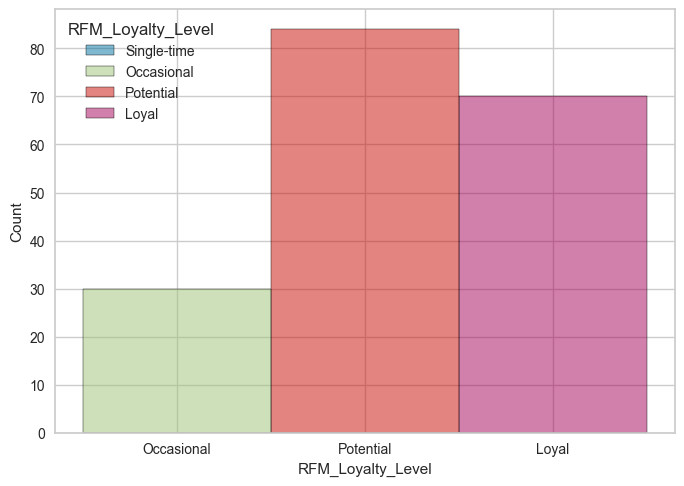

In [38]:
sns.histplot(data=rfm_scores,x='RFM_Loyalty_Level',hue ='RFM_Loyalty_Level',bins =list(range(0,700,200)))

# 4. Clustering

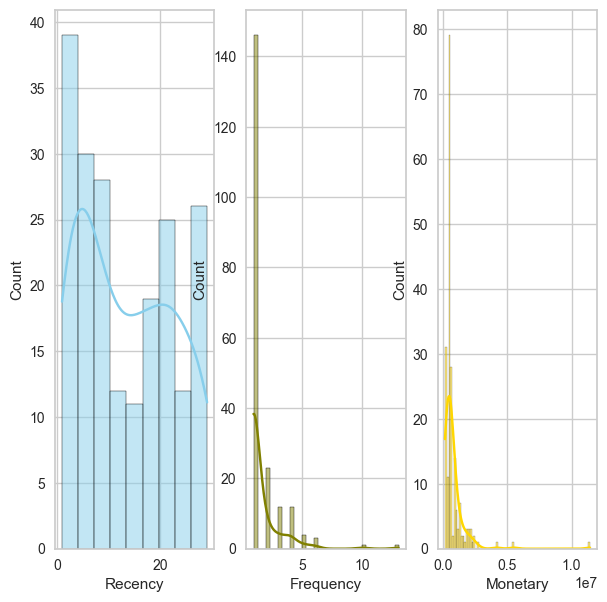

In [40]:
# Memvisualisasikan distribusi variabel Recency, Frequency dan Monetary

fig, axs = plt.subplots(1,3 ,figsize=(7, 7))

sns.histplot(data=rfm_scores, x="Recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm_scores, x="Frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm_scores, x="Monetary", kde=True, color="gold", ax=axs[2])

plt.show()

- Diperiksa sebaran Recency, Frequency dan Monetary, terlihat sebarannya miring.
- Oleh karena itu untuk mengubah data yang miring, terapkan transformasi log

In [41]:
# Membuat fungsi untuk menangani nilai tak terbatas selama transformasi log
def handle_negative_values(num):
    if num <= 0:
        return 1
    else:
        return num
    
# Menerapkan fungsi di atas ke nilai Recency, Frequency, dan Monetary
rfm_scores['Recency'] = [handle_negative_values(x) for x in rfm_scores.Recency]
rfm_scores['Frequency'] = [handle_negative_values(x) for x in rfm_scores.Frequency]
rfm_scores['Monetary'] = [handle_negative_values(x) for x in rfm_scores.Monetary]

# Melakukan transformasi Log untuk membawa data ke distribusi normal
Log_RFM = rfm_scores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_RFM.min()

Recency       0.000
Frequency     0.000
Monetary     11.849
dtype: float64

- Sebelum melakukan cluster, variabel distandarisasi menggunakan StandardScaler. 
- Standardisasi penting untuk mencegah variabel berskala besar mendominasi pembentukan cluster.

In [42]:
# Normalisasi values
scaler = StandardScaler()
scaler.fit(Log_RFM)
scaled_RFM = pd.DataFrame(scaler.transform(Log_RFM),columns= Log_RFM.columns)
scaled_RFM.head()

,Recency,Frequency,Monetary
0,0.942449,0.697659,-0.119802
1,0.601426,0.697659,-0.119802
2,0.077536,-0.561738,-0.380314
3,-1.112584,-0.561738,0.205837
4,-1.112584,1.435488,1.433137


- Salah satu masalah dalam pengelompokan adalah ia akan mengembalikan cluster meskipun datanya tidak memiliki cluster apa pun. 
- Oleh karena itu kita harus yakin bahwa kumpulan data menunjukkan kecenderungan untuk mengelompok ke dalam kelompok-kelompok secara alami. 
- Uji Hopkins digunakan untuk menilai kecenderungan pengelompokan.

In [43]:
# Uji Hopkins untuk memeriksa kecenderungan pengelompokan
def hopkins(X):
    d = X.shape[1]
    
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

- Hipotesis Nol : Kumpulan data terdistribusi secara seragam (tidak ada cluster yang berarti)
- Hipotesis Alternatif : Dataset terdistribusi secara acak (terdiri dari cluster yang bermakna)
- Hipotesis nol ditolak jika nilai H > 0,5

In [44]:
hopkins(scaled_RFM)

0.9496820653271653

- Karena nilainya mendekati 1, kita dapat menyimpulkan bahwa data berisi cluster yang bermakna.

- Sebelum melakukan clustering K-means, harus dihitung jumlah cluster yang optimal menggunakan metode Elbow. 
- Selain itu Silhouette Score juga dapat digunakan untuk memvalidasi jumlah cluster.

Kita perlu mencari jumlah cluster. Hal ini dapat dilakukan dengan salah satu dari 2 metode berikut:

1) Elbow Method
2) Silhouette Score

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

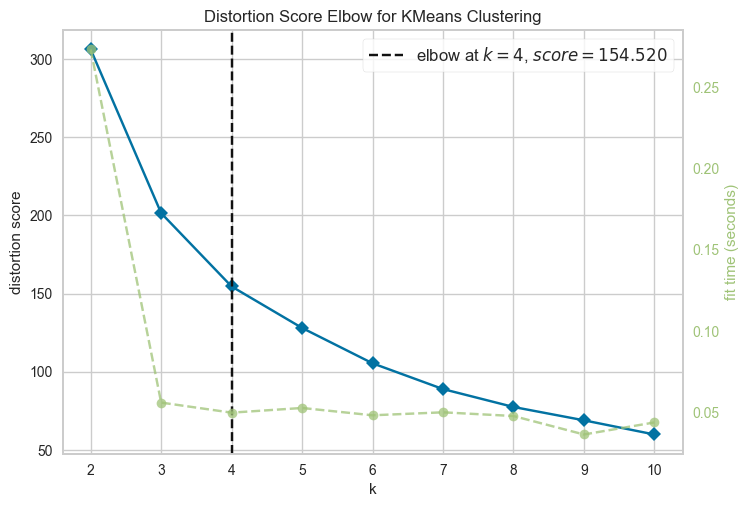

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Visualisasi elbow
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(scaled_RFM)
Elbow_M.show()

- Plot di atas menunjukkan bahwa 4 akan menjadi jumlah cluster yang optimal untuk data.
- Selain itu, kita juga menggunakan metode Silhouette Score untuk memeriksa angka optimal

In [46]:
# Silhouette Score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(scaled_RFM)
    score = silhouette_score(scaled_RFM, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

For cluster: 2, the silhouette score is: 0.5454099508844611
For cluster: 3, the silhouette score is: 0.4652029615578206
For cluster: 4, the silhouette score is: 0.46175315241250814
For cluster: 5, the silhouette score is: 0.4068809518116627


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

For cluster: 6, the silhouette score is: 0.41994738555851835
For cluster: 7, the silhouette score is: 0.4214483448351384
For cluster: 8, the silhouette score is: 0.44092315507916646
For cluster: 9, the silhouette score is: 0.44438269127695273


In [47]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(scaled_RFM)
    score = silhouette_score(scaled_RFM, kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

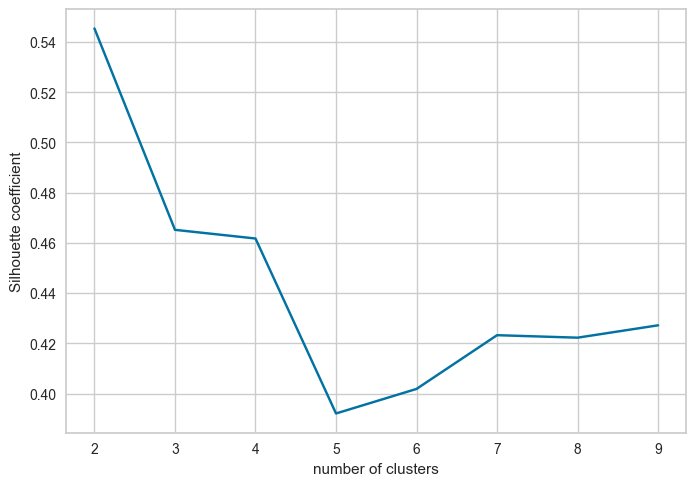

In [48]:
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

- Dari plot di atas seharusnya jumlah cluster adalah 2. 
- Oleh karena itu kita akan melakukan K-means untuk cluster = 2 dan 4 .

## 4.1 K-means Clustering

In [50]:
# Performing K-means clustering untuk cluster=4
kmeans = KMeans(n_clusters=4)
rfm_scores['kmeans_label_4'] = kmeans.fit_predict(scaled_RFM)
rfm_scores[['R','F','M','RFMGroup','RFMScore','RFM_Loyalty_Level','kmeans_label_4']].head(10)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,kmeans_label_4
CUSTOMER,,,,,,,
Bintang Hayam Wuruk po 00233,4,2,2,422,8,Potential,0
Bintang Hayam Wuruk po 01602,3,2,2,322,7,Potential,0
Bintang Hayam Wuruk po 03293,2,4,4,244,10,Loyal,2
Bintang Hayam Wuruk po 05659,1,4,2,142,7,Potential,3
Bintang Seminyak,1,1,1,111,3,Occasional,1
Bintang Ubud,1,1,1,111,3,Occasional,1
Bintang Ubud @100gr,4,4,4,444,12,NaN,2
Bintang Ubud po 01071,3,2,1,321,6,Potential,0
Bulgary po 178882,4,4,3,443,11,Loyal,2


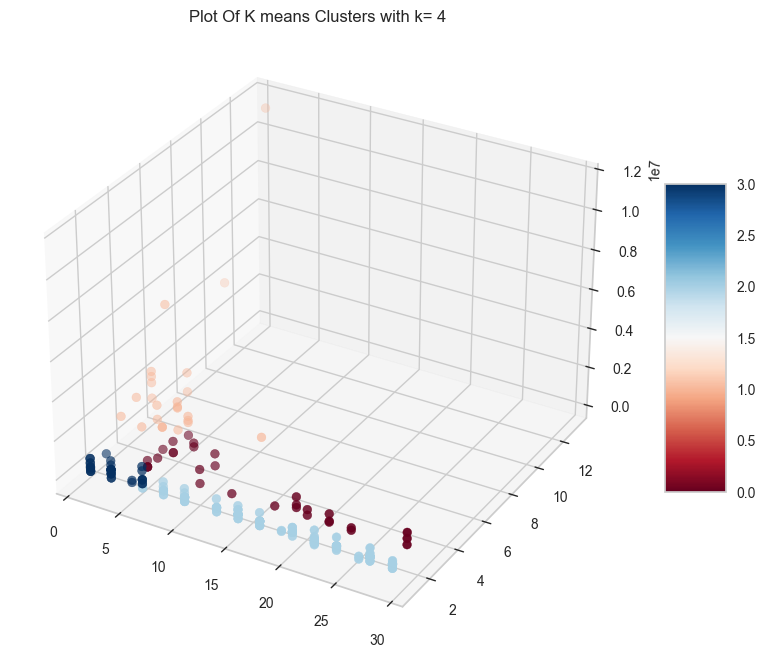

In [51]:
# Visualisasi cluster
x = rfm_scores['Recency']
y= rfm_scores['Frequency']
z = rfm_scores['Monetary']

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d') 
surf= ax.scatter(x, y, z, s=40, c=rfm_scores["kmeans_label_4"], marker='o',cmap='RdBu')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Plot Of K means Clusters with k= 4")
plt.show()

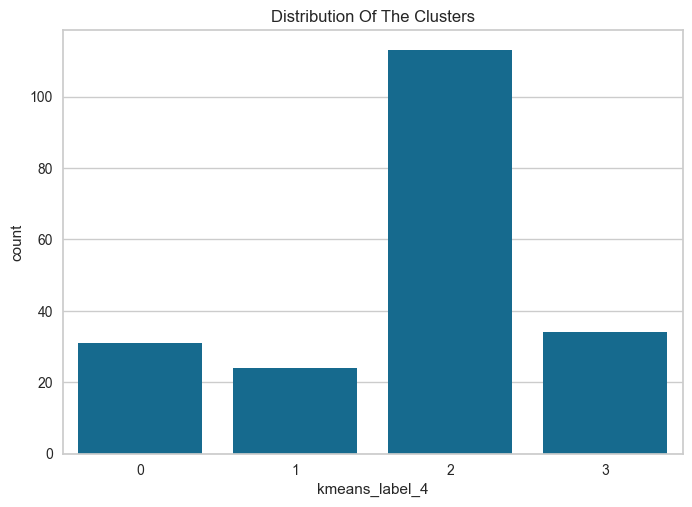

In [58]:
# Distribusi dari cluster = 4
pl = sns.countplot(x=rfm_scores["kmeans_label_4"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [53]:
# Performing K-means clustering untuk cluster=2
kmeans_2 = KMeans(n_clusters=2)
rfm_scores['kmeans_label_2'] = kmeans_2.fit_predict(scaled_RFM)
rfm_scores[['R','F','M','RFMGroup','RFMScore','RFM_Loyalty_Level','kmeans_label_2']].head(10)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,kmeans_label_2
CUSTOMER,,,,,,,
Bintang Hayam Wuruk po 00233,4,2,2,422,8,Potential,0
Bintang Hayam Wuruk po 01602,3,2,2,322,7,Potential,0
Bintang Hayam Wuruk po 03293,2,4,4,244,10,Loyal,0
Bintang Hayam Wuruk po 05659,1,4,2,142,7,Potential,0
Bintang Seminyak,1,1,1,111,3,Occasional,1
Bintang Ubud,1,1,1,111,3,Occasional,1
Bintang Ubud @100gr,4,4,4,444,12,NaN,0
Bintang Ubud po 01071,3,2,1,321,6,Potential,0
Bulgary po 178882,4,4,3,443,11,Loyal,0


In [54]:
# jumlah ukuran di cluster = 4
cluster_size= pd.DataFrame()
cluster_size['kmeans_size_4'] = rfm_scores.groupby("kmeans_label_4").size().to_frame()
cluster_size

,kmeans_size_4
kmeans_label_4,
0,31
1,24
2,113
3,34


In [55]:
# jumlah ukuran di cluster = 2
cluster_size['kmeans_size_2'] = rfm_scores.groupby("kmeans_label_2").size().to_frame()
cluster_size

,kmeans_size_4,kmeans_size_2
kmeans_label_4,,
0,31,166.0
1,24,36.0
2,113,NaN
3,34,NaN


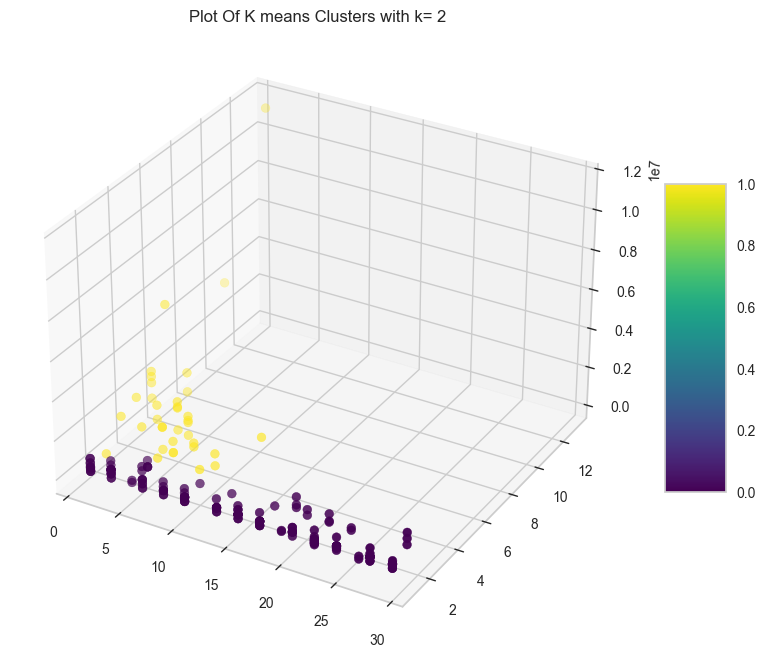

In [56]:
# Visualisasi K-means clustering dengan cluster = 2
x = rfm_scores['Recency']
y= rfm_scores['Frequency']
z = rfm_scores['Monetary']
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d') 
color=('red','green','blue')
surf= ax.scatter(x, y, z, s=40, c=rfm_scores["kmeans_label_2"], marker='o', cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Plot Of K means Clusters with k= 2")
plt.show()

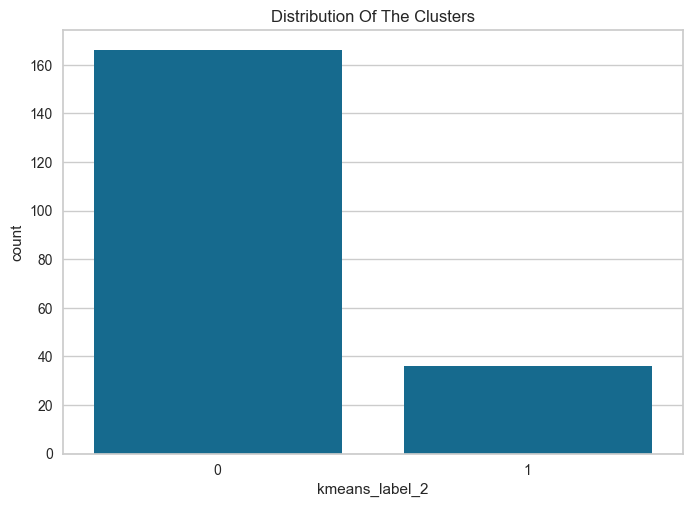

In [57]:
# Distribusi dari cluster = 2
pl = sns.countplot(x=rfm_scores["kmeans_label_2"])
pl.set_title("Distribution Of The Clusters")
plt.show()

## 4.2 DBSCAN Clustering

- Mengatur MinPts sebagai 2 * dimensi (6) untuk mencari nilai Eps.
- Menghasilkan elbow plot untuk mencari nilai Eps

<Figure size 1200x600 with 0 Axes>

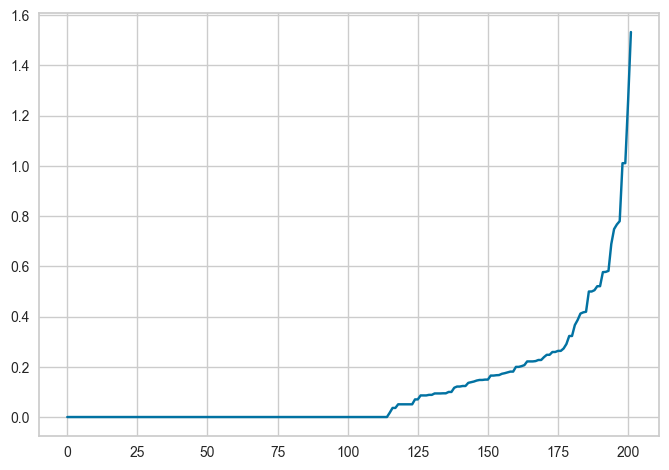

<Figure size 1200x600 with 0 Axes>

In [59]:
neighbours = NearestNeighbors(n_neighbors = 6)
knn_data = neighbours.fit(scaled_RFM)

distances, indices = knn_data.kneighbors(scaled_RFM)

sorting_distance = np.sort(distances, axis = 0)

sorted_distance = sorting_distance[:,1]
plt.plot(sorted_distance)

plt.figure(figsize = (12,6))

In [60]:
min_samples = range(6,19)
eps = np.arange(0.25,0.60, 0.01)

In [61]:
# Mengulangi kombinasi eps dan minPts yang berbeda

output = []

for x in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=x, eps = ep).fit(scaled_RFM).labels_
        score = silhouette_score(scaled_RFM, labels)
        output.append((x, ep, score))

In [62]:
# Memilih eps dan MinPts dengan skor siluet terbaik
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.41139728651034563
min_samples: 13
eps: 0.5900000000000003


In [63]:
clusters = DBSCAN(eps= 0.56, min_samples= 17).fit(scaled_RFM)
rfm_scores['DBSCAN_label'] = clusters.labels_
set(clusters.labels_)

{-1, 0}

- Nilai -1 menunjukkan outlier/noise. Oleh karena itu ada satu cluster.

In [64]:
rfm_scores['DBSCAN_label'].value_counts()

DBSCAN_label
 0    107
-1     95
Name: count, dtype: int64

In [66]:
rfm_scores[['R','F','M','RFMGroup','RFMScore','RFM_Loyalty_Level','DBSCAN_label']] .head(10)

,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,DBSCAN_label
CUSTOMER,,,,,,,
Bintang Hayam Wuruk po 00233,4,2,2,422,8,Potential,-1
Bintang Hayam Wuruk po 01602,3,2,2,322,7,Potential,-1
Bintang Hayam Wuruk po 03293,2,4,4,244,10,Loyal,0
Bintang Hayam Wuruk po 05659,1,4,2,142,7,Potential,-1
Bintang Seminyak,1,1,1,111,3,Occasional,-1
Bintang Ubud,1,1,1,111,3,Occasional,-1
Bintang Ubud @100gr,4,4,4,444,12,NaN,0
Bintang Ubud po 01071,3,2,1,321,6,Potential,-1
Bulgary po 178882,4,4,3,443,11,Loyal,0


In [67]:
cluster_size['DBSCAN'] = rfm_scores.groupby("DBSCAN_label").size().to_frame()
cluster_size

,kmeans_size_4,kmeans_size_2,DBSCAN
kmeans_label_4,,,
0,31,166.0,107.0
1,24,36.0,NaN
2,113,NaN,NaN
3,34,NaN,NaN


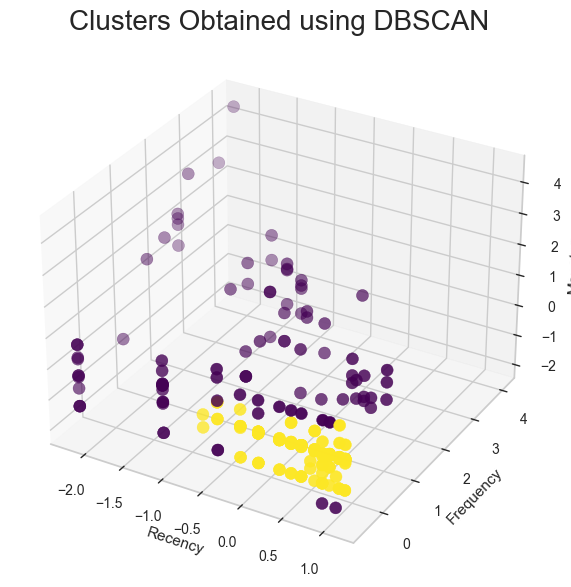

In [68]:
# Visualisasi DBSCAN cluster
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_RFM["Recency"],scaled_RFM["Frequency"],scaled_RFM["Monetary"],
               c = clusters.labels_, cmap ="viridis",s = 75)       
plt.title('Clusters Obtained using DBSCAN',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

In [34]:
# Scaling Recency, Frequency, Monetary and RFMScore columns
scaler = StandardScaler()

# Subset
rfm_scaled = rfm_scores[['Recency','Frequency','Monetary','RFMScore']]
rfm_scaled = scaler.fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled, columns = ['Recency','Frequency','Monetary','RFMScore'])
rfm_scaled.head()

,Recency,Frequency,Monetary,RFMScore
0,1.183731,0.221542,-0.246637,-0.129329
1,0.404496,0.221542,-0.246637,-0.492169
2,-0.374738,-0.446391,-0.330999,0.596351
3,-1.153972,-0.446391,-0.117584,-0.492169
4,-1.153972,0.889476,0.736078,-1.943530


## 4.1 Evaluasi klaster optimal menggunakan Elbow Method

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

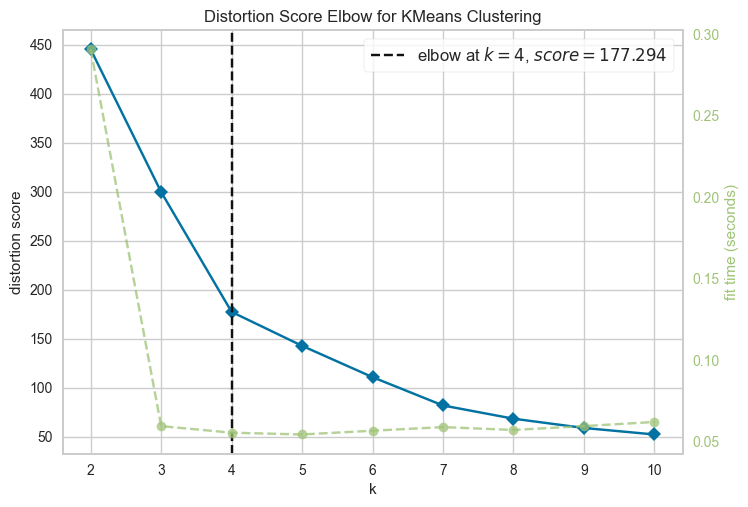

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Nilai k untuk menghitung skor siluet
# Jika bilangan bulat tunggal ditentukan, maka rentang (2,k) akan dihitung
elbow_method = KElbowVisualizer(KMeans(), k = 10, colors = 'viridis') # range = [2, 10]
elbow_method.fit(rfm_scaled)
elbow_method.show()

In [36]:
# Fit Kmeans at n_clusters = 4
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=50,verbose=0)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4, n_init=10)

In [37]:
# Assigning Clusters
centres = kmeans.cluster_centers_
rfm_scores['Clusters_Kmeans'] = kmeans.labels_
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Clusters_Kmeans
CUSTOMER,,,,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8,Potential,1
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7,Potential,0
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10,Loyal,0
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7,Potential,0
Bintang Seminyak,3,3,1487500,1,1,1,111,3,Occasional,2


C:\Users\USER\AppData\Local\Temp\ipykernel_8400\1653252555.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = rfm_scores, x = "Clusters_Kmeans", y = "Recency" , palette = 'YlOrBr', ax = ax[0])
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\USER\AppData\Local\Programs\Python\P

Text(0, 0.5, 'Monetary')

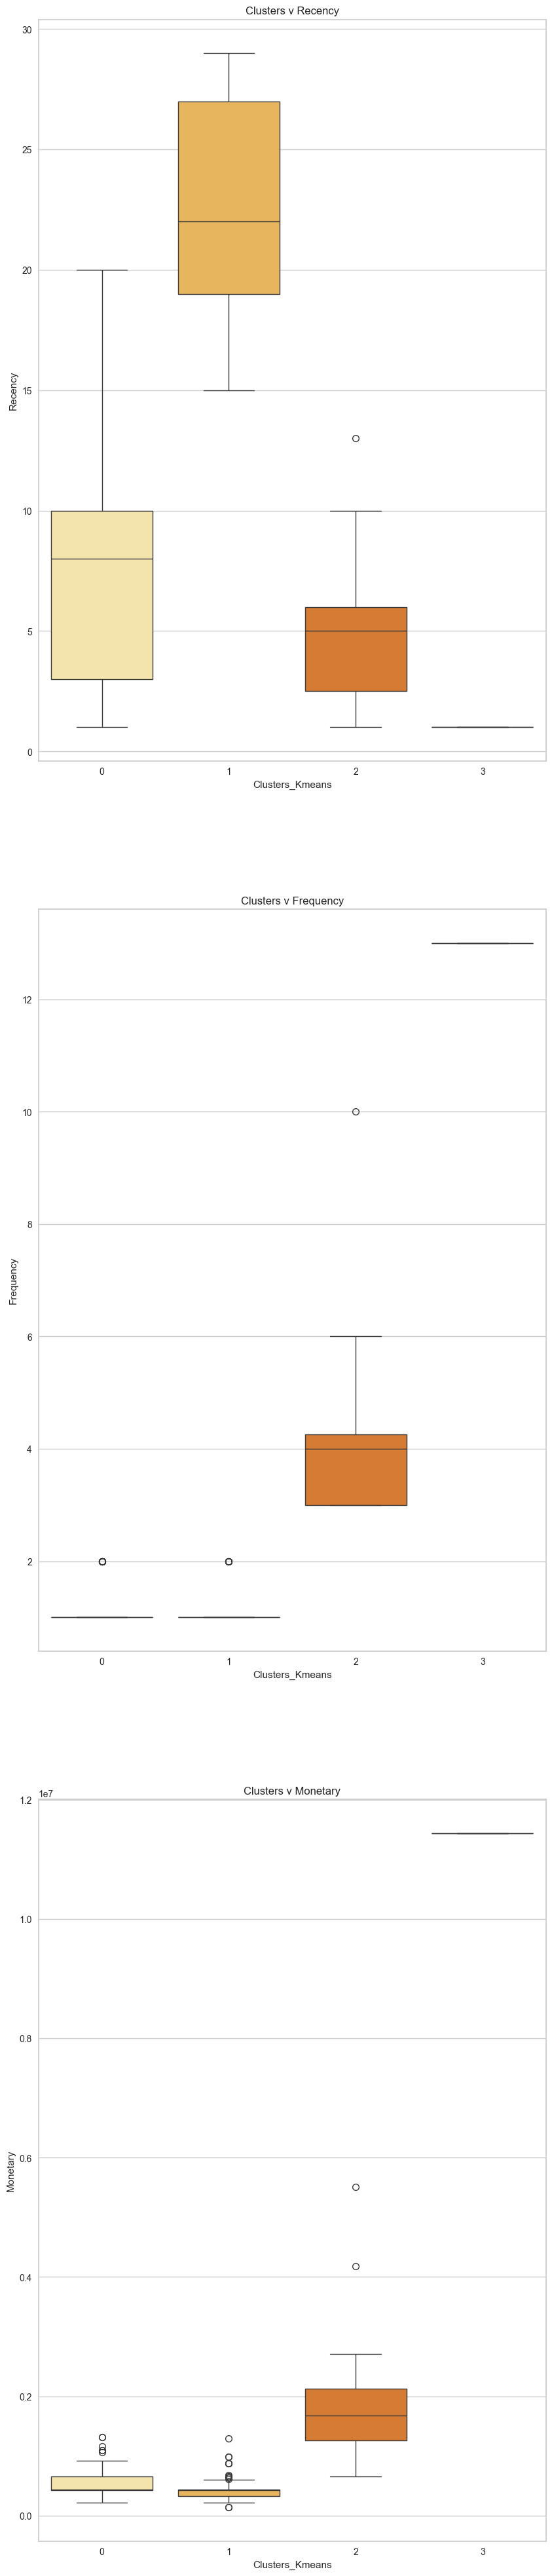

In [38]:
# Plot
fig, ax = plt.subplots(3, 1, figsize = (10, 50))

# Recency
sns.boxplot(data = rfm_scores, x = "Clusters_Kmeans", y = "Recency" , palette = 'YlOrBr', ax = ax[0])
ax[0].set_title('Clusters v Recency')
ax[0].set_ylabel('Recency')

# Frequency
sns.boxplot(data = rfm_scores, x = "Clusters_Kmeans", y = "Frequency" , palette = 'YlOrBr', ax = ax[1])
ax[1].set_title('Clusters v Frequency')
ax[1].set_ylabel('Frequency')

# Monetary
sns.boxplot(data = rfm_scores, x = "Clusters_Kmeans", y = "Monetary" , palette = 'YlOrBr', ax = ax[2])
ax[2].set_title('Clusters v Monetary')
ax[2].set_ylabel('Monetary')

In [39]:
rfm_stats = rfm_scores[["Clusters_Kmeans","RFMScore", "Recency", "Frequency", "Monetary"]].groupby("Clusters_Kmeans").agg(["mean"])
rfm_stats.columns = ["RFM_Score_Mean", "Recency_Mean", "Frequency_Mean", "Monetary_Mean"]
rfm_stats

,RFM_Score_Mean,Recency_Mean,Frequency_Mean,Monetary_Mean
Clusters_Kmeans,,,,
0,8.152941,7.811765,1.164706,5.479882e+05
1,10.476190,22.452381,1.107143,4.401146e+05
2,3.500000,4.656250,4.125000,1.794887e+06
3,3.000000,1.000000,13.000000,1.144000e+07


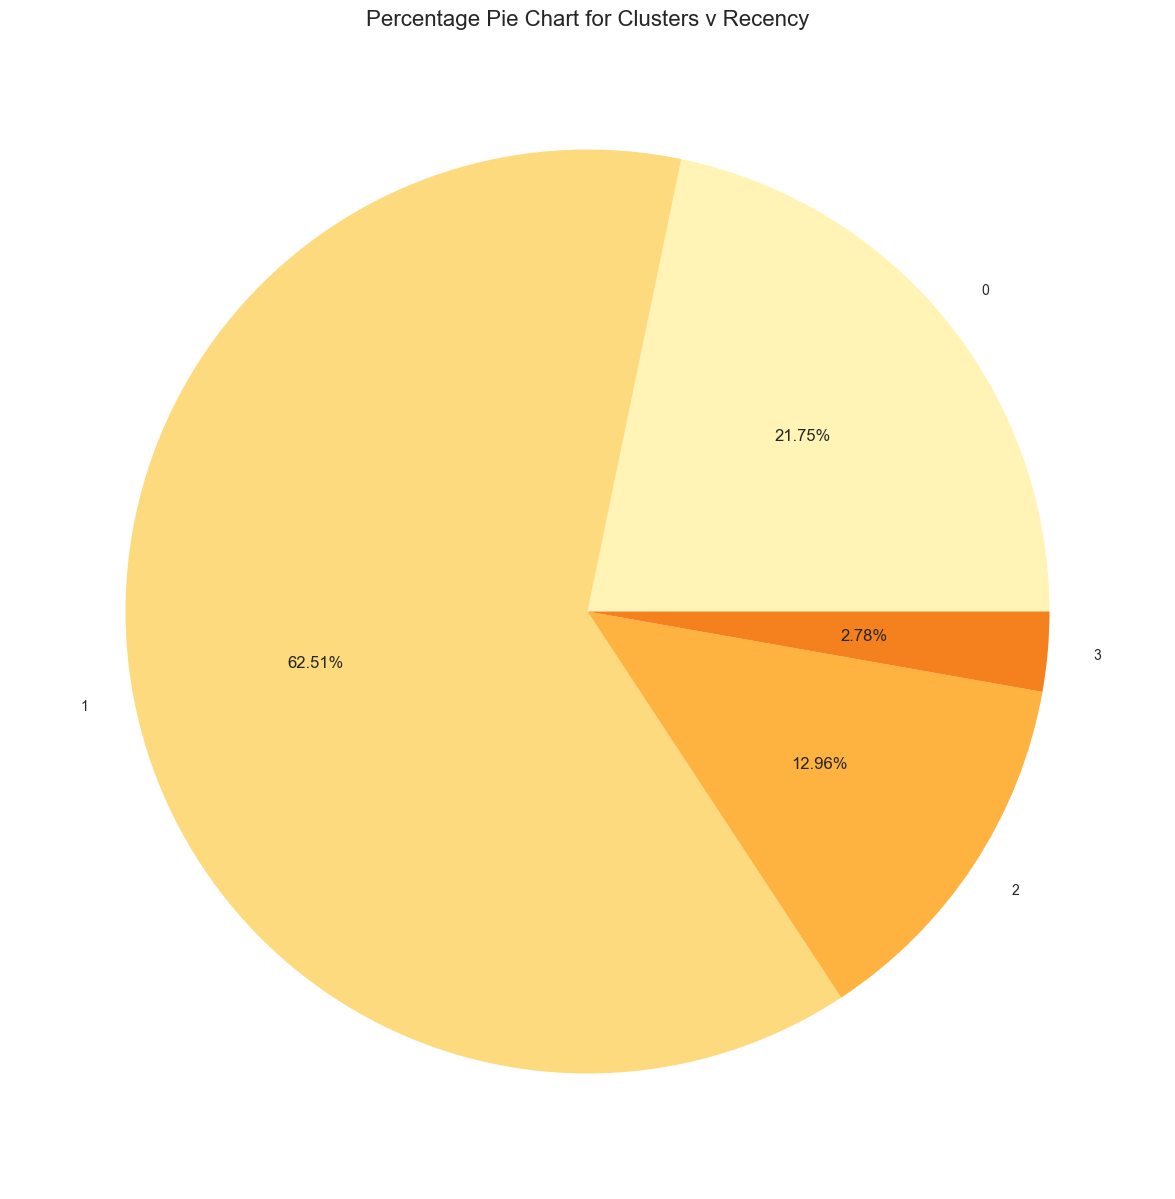

In [40]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per day of week
plt.pie(rfm_stats['Recency_Mean'], labels = rfm_stats.index , colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Clusters v Recency', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

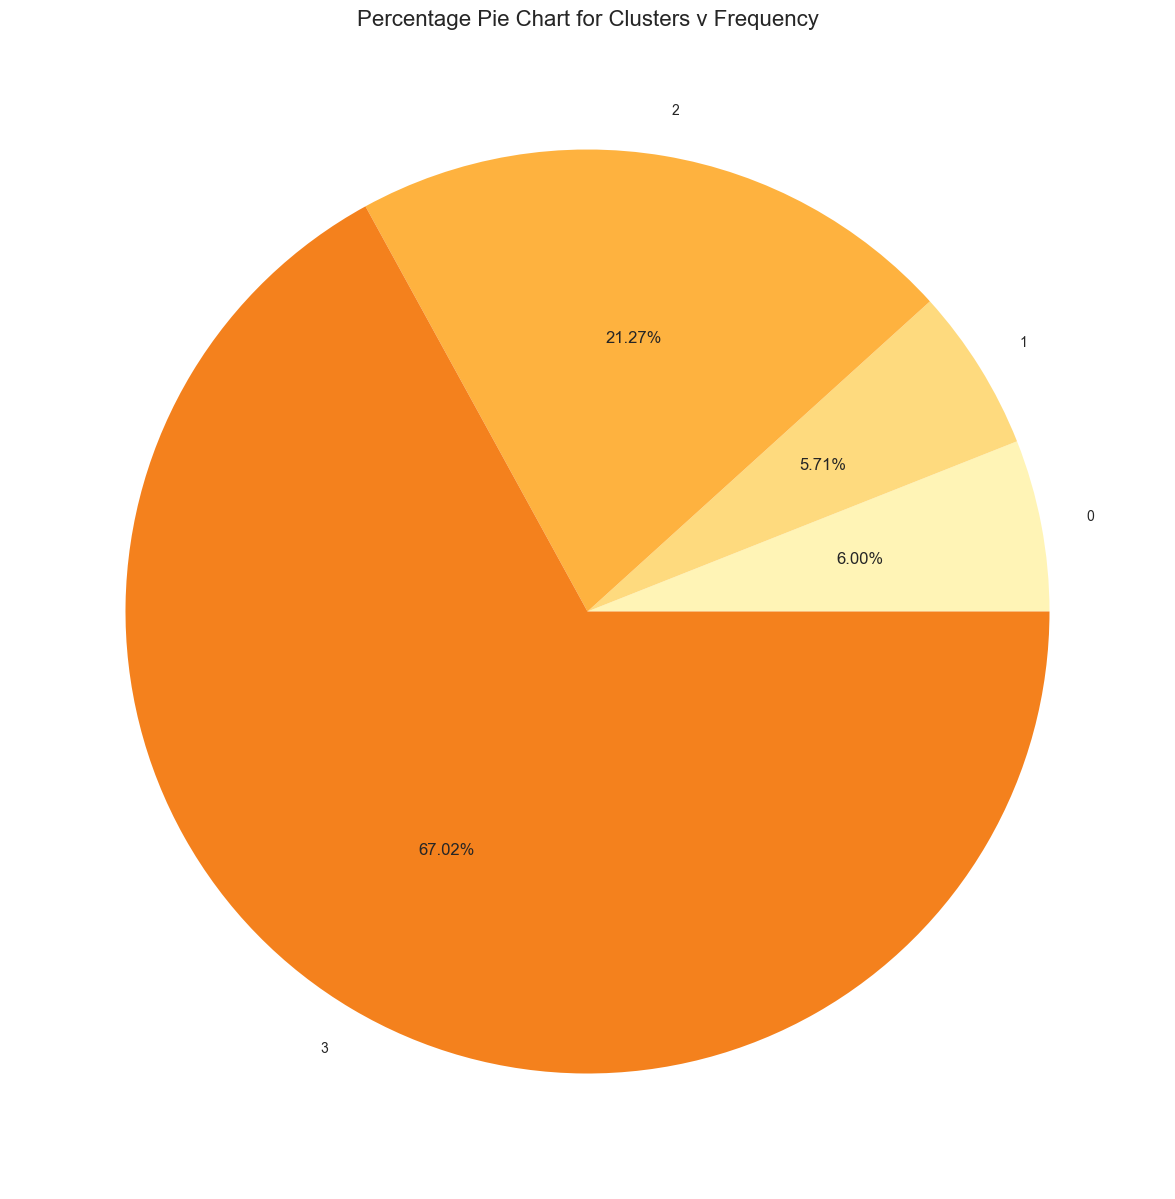

In [41]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per day of week
plt.pie(rfm_stats['Frequency_Mean'], labels = rfm_stats.index , colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Clusters v Frequency', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

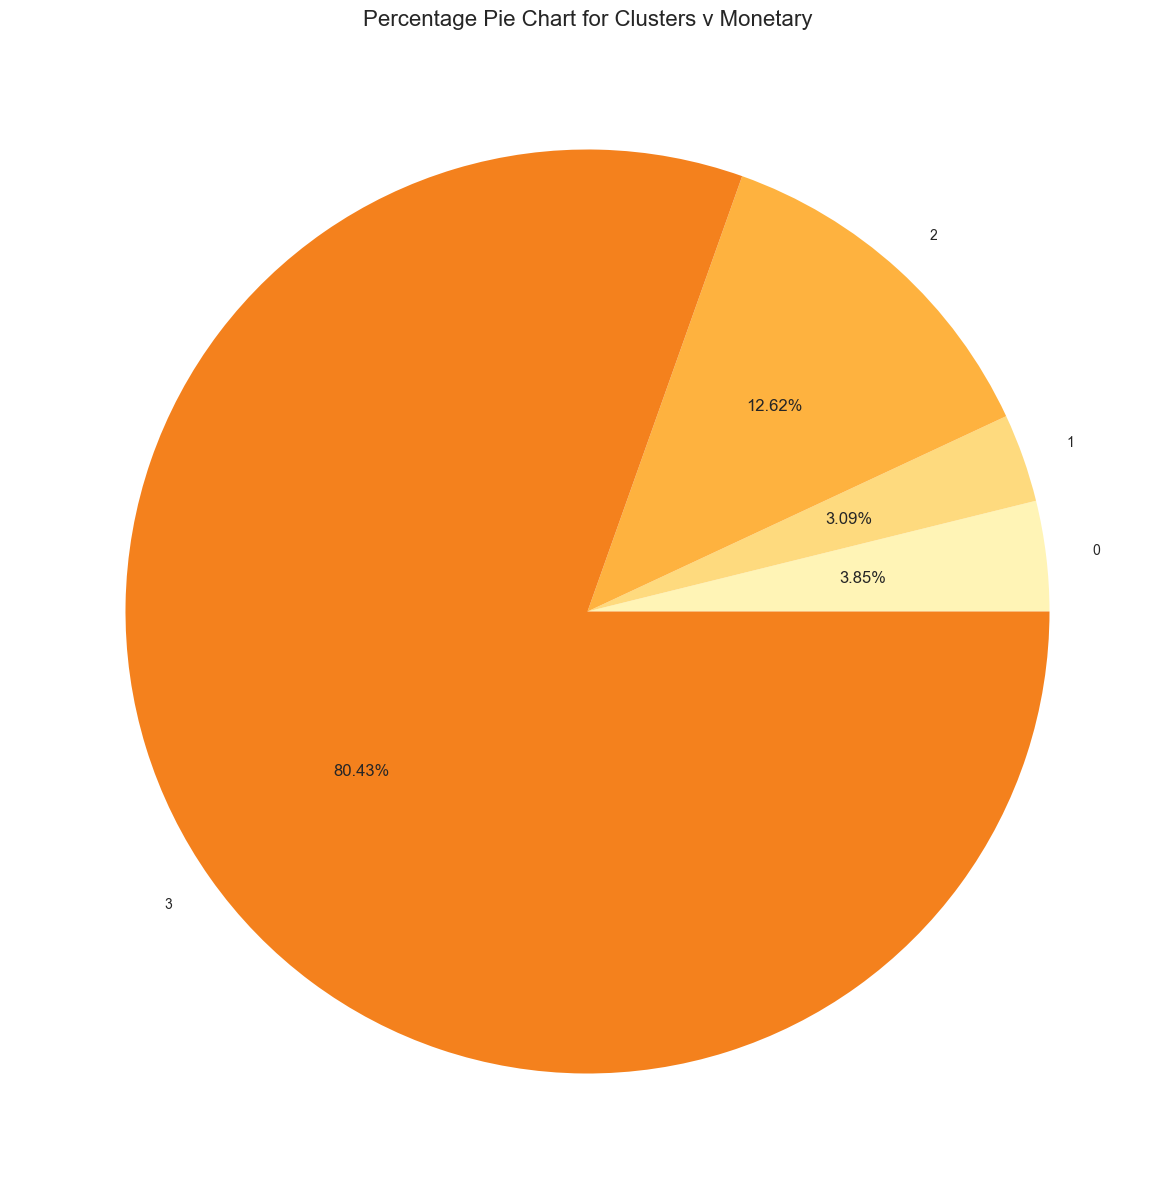

In [42]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per day of week
plt.pie(rfm_stats['Monetary_Mean'], labels = rfm_stats.index , colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Clusters v Monetary', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<Figure size 700x700 with 0 Axes>

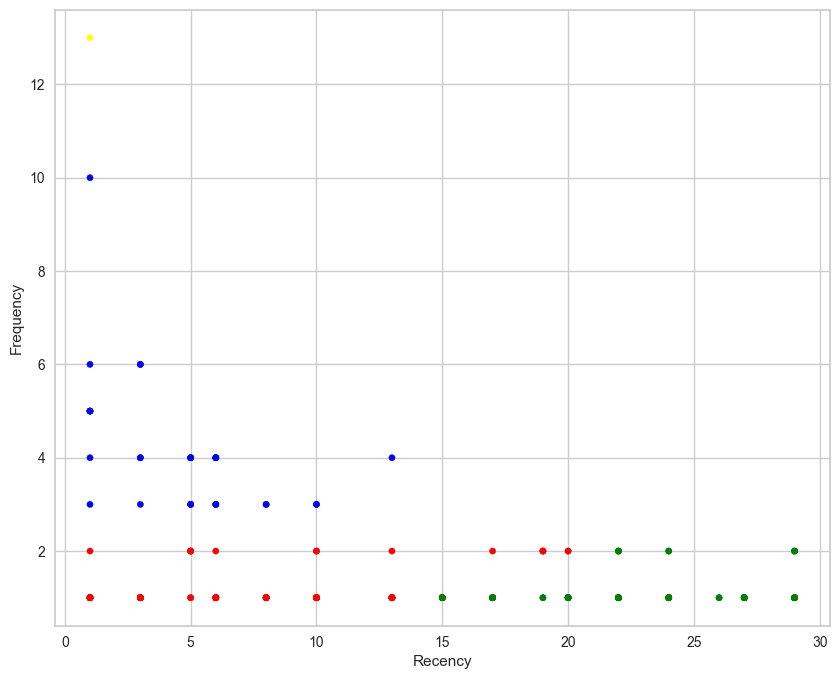

In [43]:
# Visualisasi hubungan antara Recency dan Frequency
# Membuat gambar dengan ukuran 7 x 7
plt.figure(figsize=(7,7))

# Mendefinisikan warna yang akan digunakan untuk mewarnai titik-titik dalam scater plot
Colors = ["red", "green", "blue", "yellow"]
# Menambahkan kolom Color ke Data Frame
rfm_scores['Color_Kmeans'] = rfm_scores['Clusters_Kmeans'].map(lambda p: Colors[p])
ax = rfm_scores.plot(    
    kind="scatter", 
    # Recency pada sumbu x dan frequency pada sumbu y
    x="Recency", y="Frequency",
    # Menentukan ukuran scatter plot
    figsize=(10,8),
    c = rfm_scores['Color_Kmeans']
)

In [44]:
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Clusters_Kmeans,Color_Kmeans
CUSTOMER,,,,,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8,Potential,1,green
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7,Potential,0,red
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10,Loyal,0,red
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7,Potential,0,red
Bintang Seminyak,3,3,1487500,1,1,1,111,3,Occasional,2,blue


In [49]:
import matplotlib.pyplot as plt

# Memisahkan koordinat x dan y untuk scatter plot
x = rfm_scaled[:, 0]  # Misalnya Recency
y = rfm_scaled[:, 1]  # Misalnya Frequency

# Memplot titik-titik data dengan warna berdasarkan label cluster
plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)

# Memplot pusat cluster
plt.scatter(centres[:, 0], centres[:, 1], marker='*', s=200, edgecolors='black', color='red')

# Menambahkan label pada sumbu dan judul plot
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Plot with 4 Clusters')

# Menampilkan plot
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

Observasi:

1. Cluster 0:
    - nnxjkhxk
    - bhjxkx

2. Cluster 1:
    - shuwks
    - dkwlw
    - hxwhnkx

3. Cluster 2:
    - dxiwl
    - kdhw

4. Cluster 3:
    - ishnk
    - ihxks

# 5. DBSCAN Clustering